Import necessary libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as plt
import seaborn as sns
import sklearn 

Create dataframe, drop unnecessary features, integrate one hot encoding for object types

In [2]:
data = pd.read_csv("Iowa.csv")
data = data.drop('DOY', axis = 1)
data = data.drop('Chlorophyll', axis = 1)
data = data.drop('Year', axis = 1)
data = data.join(pd.get_dummies(data.Lake, dtype = 'int')).drop(['Lake'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Phycocyanin                 643 non-null    float64
 1   DissolvedOxygen_Saturation  643 non-null    float64
 2   pH                          643 non-null    float64
 3   Temperature                 643 non-null    float64
 4   Blackhawk Lake              643 non-null    int32  
 5   Green Valley Lake           643 non-null    int32  
 6   South Twin Lake             643 non-null    int32  
 7   Swan Lake                   643 non-null    int32  
dtypes: float64(4), int32(4)
memory usage: 30.3 KB


It is always good practice to drop one of the features from a column that you one hot encoded. This is because the remaining new columns will provide the same information without one of the columns. I held off on this process until I did a multicollinearity check, as I want to remove the lake with the LEAST correlation to the Phycocyanin (the least impactful lake to understanding algae blooms)

In [3]:
from src.processing import multicollinearity
multicollinearity.multicollinearity(data, 'Phycocyanin')

                      Feature         VIF
0  DissolvedOxygen_Saturation    1.956833
1                          pH    1.897086
2                 Temperature    1.419084
3              Blackhawk Lake   89.079886
4           Green Valley Lake  171.870117
5             South Twin Lake   65.103500
6                   Swan Lake   82.925219


(None,
                             Phycocyanin  DissolvedOxygen_Saturation        pH  \
 Phycocyanin                    1.000000                    0.379555  0.634571   
 DissolvedOxygen_Saturation     0.379555                    1.000000  0.590416   
 pH                             0.634571                    0.590416  1.000000   
 Temperature                    0.287148                    0.417574  0.382208   
 Blackhawk Lake                -0.249685                    0.103555 -0.271495   
 Green Valley Lake              0.325073                   -0.182825  0.108488   
 South Twin Lake               -0.012282                   -0.004567  0.038268   
 Swan Lake                     -0.123481                    0.119286  0.121643   
 
                             Temperature  Blackhawk Lake  Green Valley Lake  \
 Phycocyanin                    0.287148       -0.249685           0.325073   
 DissolvedOxygen_Saturation     0.417574        0.103555          -0.182825   
 pH             

In [4]:
data = data.drop('Blackhawk Lake', axis = 1)

In [5]:
from sklearn.model_selection import train_test_split
X = data.drop('Phycocyanin', axis = 1)
y = data['Phycocyanin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)
X_train.to_csv('../data/intermediate/X_train.csv', index = False)
X_test.to_csv('../data/intermediate/X_test.csv', index = False)
y_train.to_csv('../data/intermediate/y_train.csv', index = False)
y_test.to_csv('../data/intermediate/y_test.csv', index = False)


(<Axes: >,
 array([[<Axes: title={'center': 'DissolvedOxygen_Saturation'}>,
         <Axes: title={'center': 'pH'}>],
        [<Axes: title={'center': 'Temperature'}>,
         <Axes: title={'center': 'Green Valley Lake'}>],
        [<Axes: title={'center': 'South Twin Lake'}>,
         <Axes: title={'center': 'Swan Lake'}>]], dtype=object))

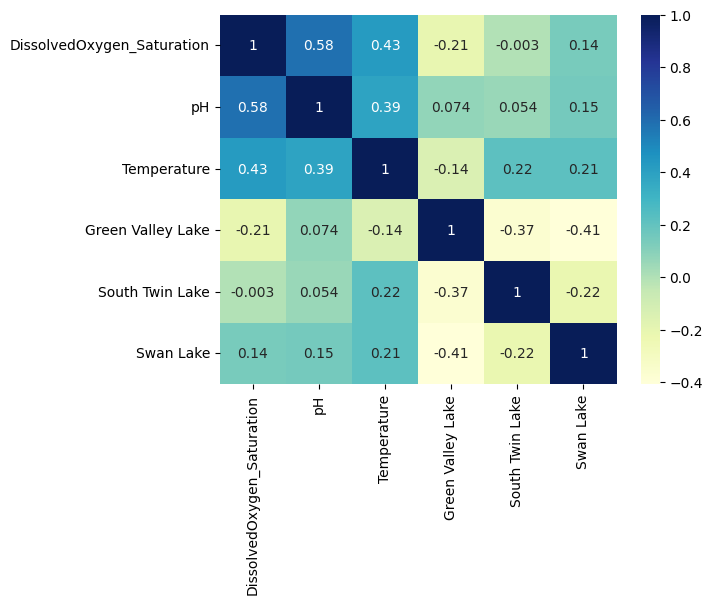

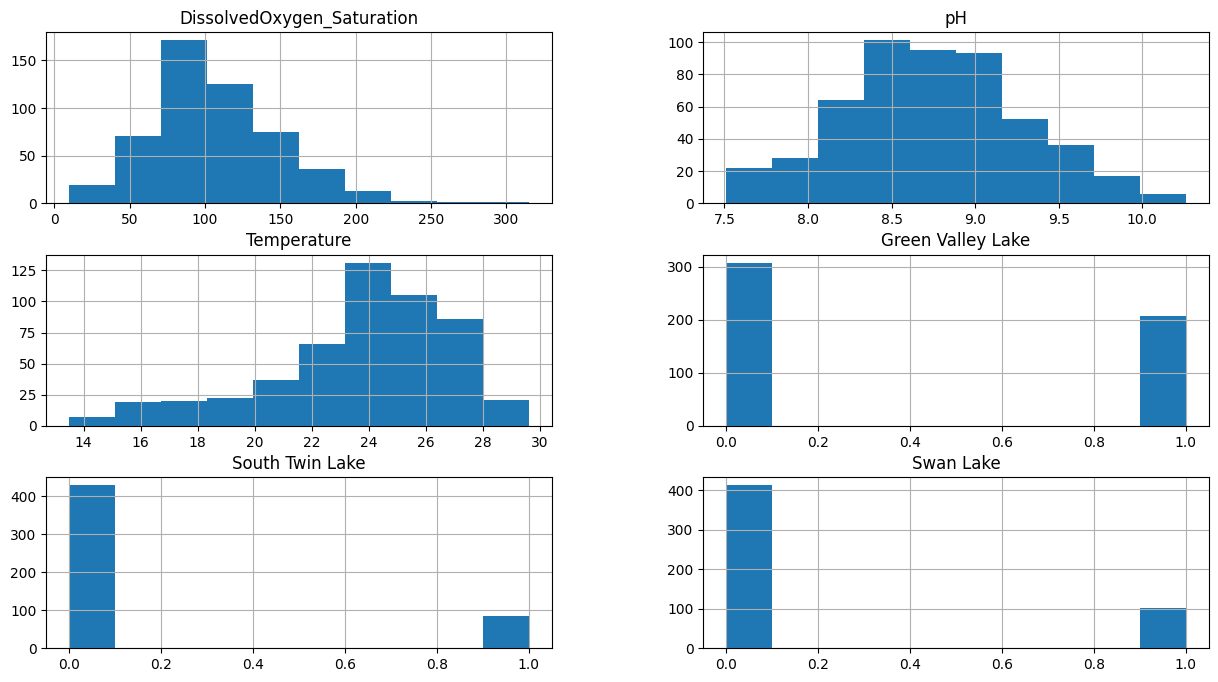

In [6]:
from src.processing import distributions
distributions.distributions(X_train)

Selected value for lambda is  3.401567576262222


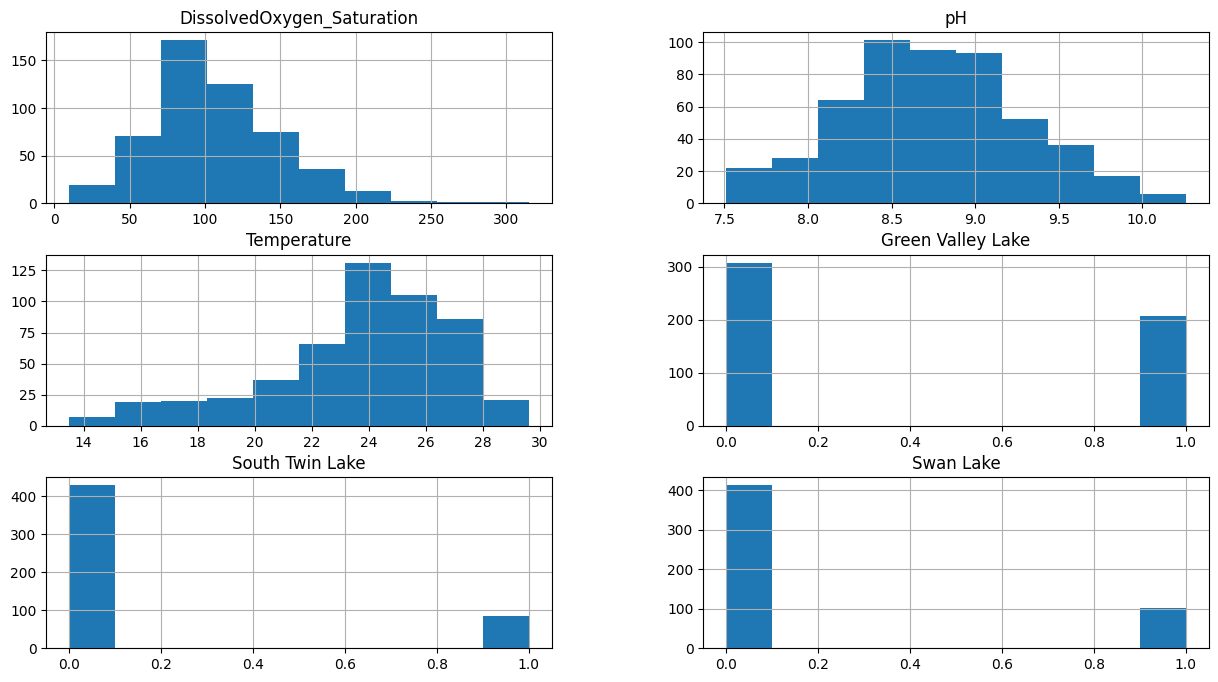

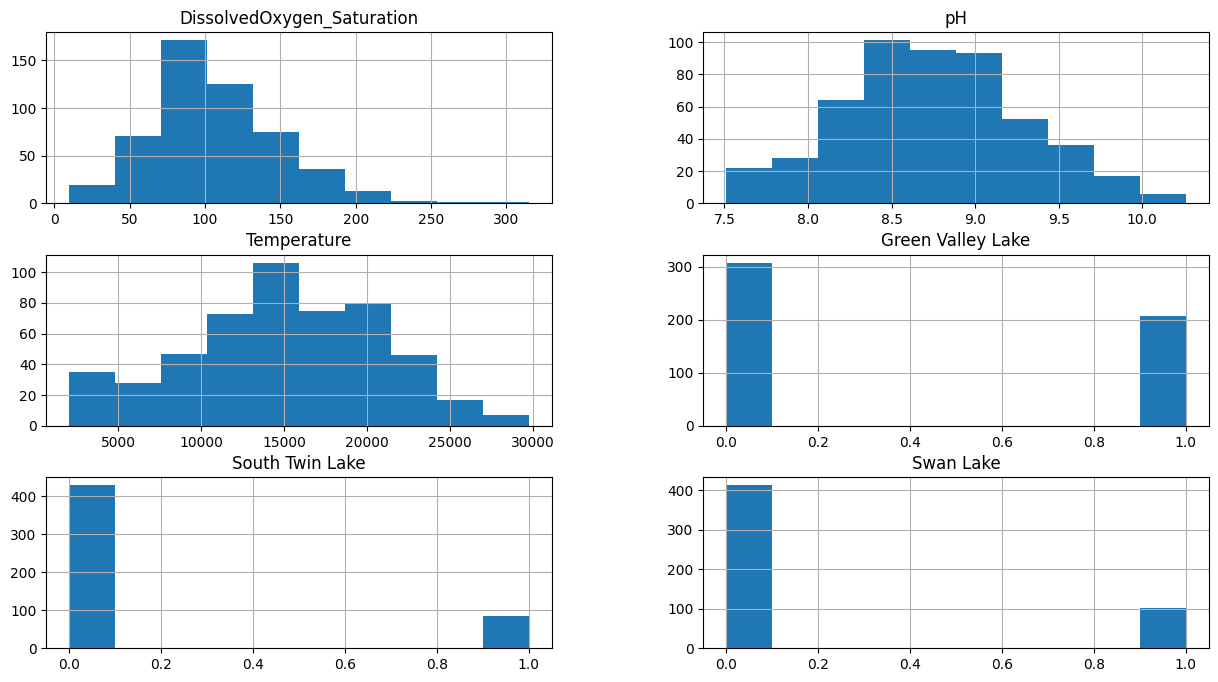

In [7]:
from src.processing import outlierxtransform

X_train = outlierxtransform.transform(X_train, ['Temperature'])

old data: 514
new data after outlier check in DissolvedOxygen_Saturation: 510
new data after outlier check in pH: 510
new data after outlier check in Temperature: 510
new data after outlier check in Green Valley Lake: 510
new data after outlier check in South Twin Lake: 510
new data after outlier check in Swan Lake: 510
final new data 510


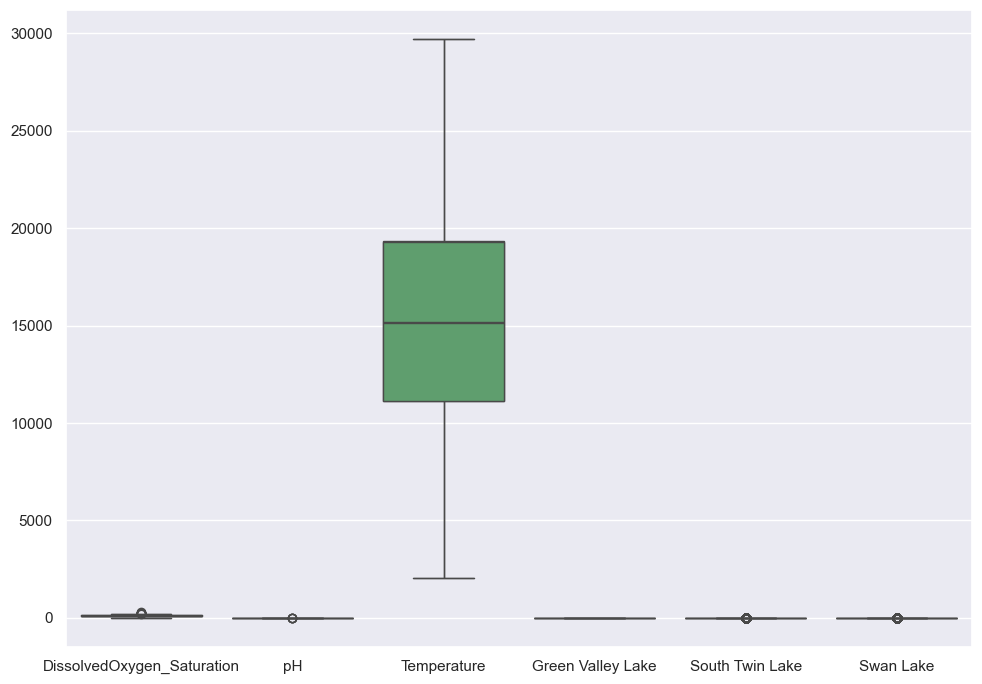

In [8]:
X_train, y_train = outlierxtransform.outlier(X_train, y_train)

In [9]:
X_train

,DissolvedOxygen_Saturation,pH,Temperature,Green Valley Lake,South Twin Lake,Swan Lake
368,67.04,9.44,10352.548655,1,0,0
186,211.41,9.00,21791.618432,1,0,0
337,220.43,10.19,24331.306659,1,0,0
150,68.49,8.06,3728.637412,0,0,0
235,9.77,7.52,15296.162045,1,0,0
...,...,...,...,...,...,...
153,93.73,8.53,10965.107886,1,0,0
528,74.89,8.09,19827.413122,0,0,1
74,131.72,8.36,22513.181138,0,0,0
176,60.97,7.89,13911.179054,1,0,0


In [10]:
from src.processing import scaling

X_train = scaling.scaling(X_train, ['DissolvedOxygen_Saturation', 'pH', 'Temperature'])
X_test = scaling.scaling(X_test, ['DissolvedOxygen_Saturation', 'pH', 'Temperature'])

Example code if you need to export a numpy array as a csv file by transforming numpy array into a pandas dataframe: 

X_train_export = pd.DataFrame({'DissolvedOxygen_Saturation':X_train[:,0], 'pH' : X_train[:,1], 'Temperature' : X_train[:,2], 'Green Valley Lake' : X_train[:, 3], 'South Twin Lake': X_train[:,4], 'Swan Lake': X_train[:,5]})
X_test_export = pd.DataFrame({'DissolvedOxygen_Saturation':X_test[:,0], 'pH' : X_test[:,1], 'Temperature' : X_test[:,2], 'Green Valley Lake' : X_test[:, 3], 'South Twin Lake': X_test[:,4], 'Swan Lake': X_test[:,5]})


In [11]:

X_train.to_csv('../data/processed/X_train.csv', index = False)
X_test.to_csv('../data/processed/X_test.csv', index = False)
y_train.to_csv('../data/processed/y_train.csv', index = False)
y_test.to_csv('../data/processed/y_test.csv', index = False)